In [1]:
from shelling_segregation import ShellingSegregation, make_gif, plot
from os.path import exists

# GIFs

## baseline

In [2]:
segregation = ShellingSegregation()
L = 100
R = 4000
B = 4000
jr = 0.5
jb = 0.5
k = 1
fname = 'baseline.gif'
if not exists(fname):
    segregation.simulate(L, R, B, jr, jb, k)
    make_gif(fname, segregation.lattice_list, L, R, B, jr, jb, k)

## $j_r$ = 0.75, $j_b$ = 0.375

In [3]:
jr = 0.75
jb = 0.375
fname = 'big_diff.gif'
if not exists(fname):
    segregation.simulate(L, R, B, jr, jb, k)
    make_gif(fname, segregation.lattice_list, L, R, B, jr, jb, k)
jr = 0.5
jb = 0.5

## k = 3

In [4]:
k = 4
fname = 'big_neighbourhood.gif'
if not exists(fname):
    segregation.simulate(L, R, B, jr, jb, k)
    make_gif(fname, segregation.lattice_list, L, R, B, jr, jb, k)
k = 1

# Plots

## iterations(N)

In [5]:
MC_N = 100

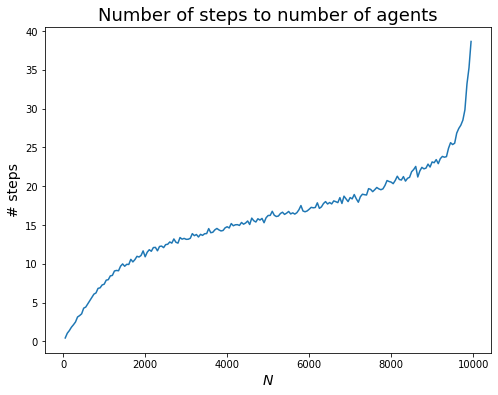

In [6]:
plot(segregation, 1, "iterations_N.json", MC_N, L, R, B, jr, jb, k)

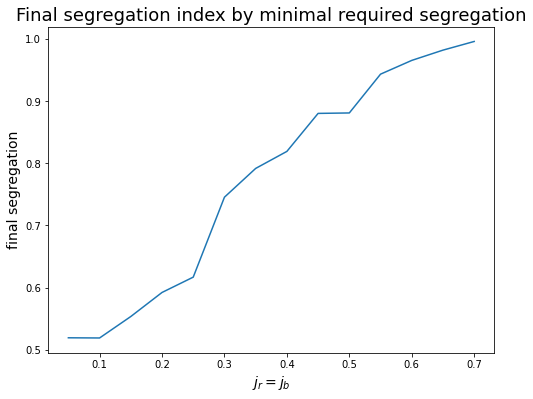

In [7]:
plot(segregation, 2, "segregation_j.json", MC_N, L, R, B, jr, jb, k)

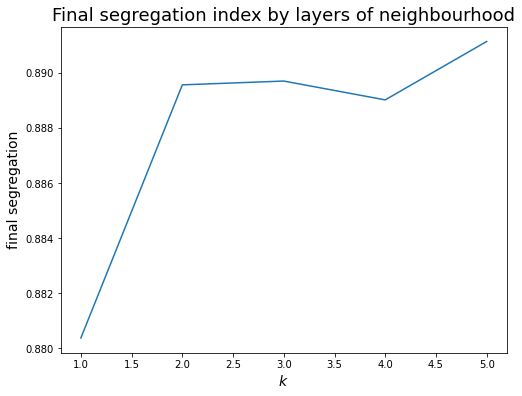

In [8]:
plot(segregation, 3, "segregation_k.json", MC_N, L, R, B, jr, jb, k)